In [1]:
import numpy as np
from matplotlib import pyplot as plt
import real_space_electrostatic_sum

# Benchmarking

Using the shared library `real-space-electrostatic-sum.so`, together with the Python wrapper in `real_space_electrostatic_sum.py`, this notebook reproduces results from [Pickard, *Phys. Rev. Mat.* **2**, 013806 (2018)](https://doi.org/10.1103/PhysRevMaterials.2.013806).

## Reproducing part of Fig. 1(b)

Fig. 1(b) in the paper demonstrates the convergence of the real-space method for a simple cubic lattice with unit spacing.

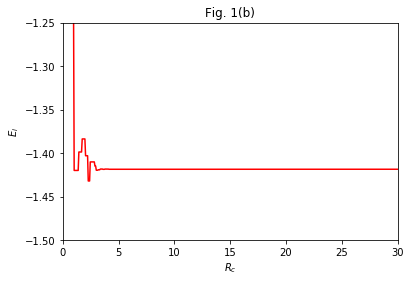

In [2]:
# lattice vectors
a_1 = np.array([1.0, 0.0, 0.0])
a_2 = np.array([0.0, 1.0, 0.0])
a_3 = np.array([0.0, 0.0, 1.0])

# ion locations and charge array
loc = np.zeros([1,3])
chg = np.ones(1)

# loop over cutoff radii
r_c = np.linspace(0.001,30,500)
r_d = 1.5
ene = np.zeros(len(r_c))
for i, r in enumerate(r_c):
    ene[i] = real_space_electrostatic_sum.energy(
            a_1, a_2, a_3, loc.shape[0], loc[:,0], loc[:,1], loc[:,2], chg, r, r_d)
    
# generate part of Fig. 1(b)
plt.plot(r_c, ene, 'r')
plt.title('Fig. 1(b)')
plt.xlim([0,30]); plt.ylim([-1.5,-1.25])
plt.xlabel('$R_c$');  plt.ylabel('$E_i$')
plt.show()

## Reproducing data in Table I

Table I in the paper contains ion-ion energies for four crystals obtained with the real-space method, as well as the Ewald method. The real-space method data are re-generated here, exhibiting near perfect agreement with Table I. The Ewald energies reported below were re-obtained with CASTEP using the exact lattice parameters employed here.

### _Al_

In [3]:
# lattice vectors
a_1 = np.array([5.41141973394663, 0.00000000000000, 0.00000000000000])
a_2 = np.array([2.70570986697332, 4.68642696013821, 0.00000000000000])
a_3 = np.array([2.70570986697332, 1.56214232004608, 4.41840571073226])

# ion locations
loc = np.zeros([1,3])

# charge array
chg = 3.0 * np.ones(loc.shape[0])

# length scale
h_max = 4.42

# reference energy
ewald = -2.69595457432924945
print('Ewald:       energy = {0:12.9f}'.format(-2.69595457432924945))

# real-space-method energies
r_d_hat = 2.0
ene = real_space_electrostatic_sum.energy(
        a_1, a_2, a_3, loc.shape[0], loc[:,0], loc[:,1], loc[:,2], chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)
print('R\u0302d = {0:3.1f}:    energy = {1:12.9f}'.format(r_d_hat, ene))
r_d_hat = 1.5
ene = real_space_electrostatic_sum.energy(
        a_1, a_2, a_3, loc.shape[0], loc[:,0], loc[:,1], loc[:,2], chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)
print('R\u0302d = {0:3.1f}:    energy = {1:12.9f}'.format(r_d_hat, ene))
r_d_hat = 1.0
ene = real_space_electrostatic_sum.energy(
        a_1, a_2, a_3, loc.shape[0], loc[:,0], loc[:,1], loc[:,2], chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)
print('R\u0302d = {0:3.1f}:    energy = {1:12.9f}'.format(r_d_hat, ene))

Ewald:       energy = -2.695954574
R̂d = 2.0:    energy = -2.695954574
R̂d = 1.5:    energy = -2.695954574
R̂d = 1.0:    energy = -2.696027958


### _Si_

In [4]:
# lattice vectors
a_1 = np.array([7.25654832321381, 0.00000000000000, 0.00000000000000])
a_2 = np.array([3.62827416160690, 6.28435519169252, 0.00000000000000])
a_3 = np.array([3.62827416160690, 2.09478506389751, 5.92494689524090])

# ion locations
loc = np.array([[0.0,  0.0,  0.0],
                [0.25, 0.25, 0.25]])
loc = (np.vstack((a_1, a_2, a_3)).T).dot(loc.T).T # convert to cartesian

# charge array
chg = 4.0 * np.ones(loc.shape[0])

# length scale
h_max = 5.92

# reference energy
ewald = -8.39857465282205418
print('Ewald:       energy = {0:12.9f},    per ion = {1:12.9f}'.format(ewald, ewald/loc.shape[0]))

# real-space-method energies
r_d_hat = 2.0
ene = real_space_electrostatic_sum.energy(
        a_1, a_2, a_3, loc.shape[0], loc[:,0], loc[:,1], loc[:,2], chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)
print('R\u0302d = {0:3.1f}:    energy = {1:12.9f},    per ion = {2:12.9f}'.format(r_d_hat, ene, ene/loc.shape[0]))
r_d_hat = 1.5
ene = real_space_electrostatic_sum.energy(
        a_1, a_2, a_3, loc.shape[0], loc[:,0], loc[:,1], loc[:,2], chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)
print('R\u0302d = {0:3.1f}:    energy = {1:12.9f},    per ion = {2:12.9f}'.format(r_d_hat, ene, ene/loc.shape[0]))
r_d_hat = 1.0
ene = real_space_electrostatic_sum.energy(
        a_1, a_2, a_3, loc.shape[0], loc[:,0], loc[:,1], loc[:,2], chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)
print('R\u0302d = {0:3.1f}:    energy = {1:12.9f},    per ion = {2:12.9f}'.format(r_d_hat, ene, ene/loc.shape[0]))

Ewald:       energy = -8.398574653,    per ion = -4.199287326
R̂d = 2.0:    energy = -8.398574653,    per ion = -4.199287326
R̂d = 1.5:    energy = -8.398574651,    per ion = -4.199287326
R̂d = 1.0:    energy = -8.398589712,    per ion = -4.199294856


### _SiO2_

In [5]:
# lattice vectors
a_1 = np.array([ 9.28422445623683, 0.00000000000000, 0.00000000000000])
a_2 = np.array([-4.64211222811842, 8.04037423353787, 0.00000000000000])
a_3 = np.array([ 0.00000000000000, 0.00000000000000, 10.2139697101486])

# ion locations
loc = np.array([[0.41500, 0.27200, 0.21300],
                [0.72800, 0.14300, 0.54633],
                [0.85700, 0.58500, 0.87967],
                [0.27200, 0.41500, 0.78700],
                [0.14300, 0.72800, 0.45367],
                [0.58500, 0.85700, 0.12033],
                [0.46500, 0.00000, 0.33333],
                [0.00000, 0.46500, 0.66667],
                [0.53500, 0.53500, 0.00000]])
loc = (np.vstack((a_1, a_2, a_3)).T).dot(loc.T).T # convert to cartesian

# charge array
chg = 6.0 * np.ones(loc.shape[0])  # most are O
chg[6:] = 4.0                      # three are Si

# length scale
h_max = 10.21

# reference energy
ewald = -69.48809871723248932
print('Ewald:       energy = {0:12.9f},    per ion = {1:12.9f}'.format(ewald, ewald/loc.shape[0]))

# real-space-method energies
r_d_hat = 2.0
ene = real_space_electrostatic_sum.energy(
        a_1, a_2, a_3, loc.shape[0], loc[:,0], loc[:,1], loc[:,2], chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)
print('R\u0302d = {0:3.1f}:    energy = {1:12.9f},    per ion = {2:12.9f}'.format(r_d_hat, ene, ene/loc.shape[0]))
r_d_hat = 1.5
ene = real_space_electrostatic_sum.energy(
        a_1, a_2, a_3, loc.shape[0], loc[:,0], loc[:,1], loc[:,2], chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)
print('R\u0302d = {0:3.1f}:    energy = {1:12.9f},    per ion = {2:12.9f}'.format(r_d_hat, ene, ene/loc.shape[0]))
r_d_hat = 1.0
ene = real_space_electrostatic_sum.energy(
        a_1, a_2, a_3, loc.shape[0], loc[:,0], loc[:,1], loc[:,2], chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)
print('R\u0302d = {0:3.1f}:    energy = {1:12.9f},    per ion = {2:12.9f}'.format(r_d_hat, ene, ene/loc.shape[0]))

Ewald:       energy = -69.488098717,    per ion = -7.720899857
R̂d = 2.0:    energy = -69.488098717,    per ion = -7.720899857
R̂d = 1.5:    energy = -69.488098713,    per ion = -7.720899857
R̂d = 1.0:    energy = -69.487434045,    per ion = -7.720826005


### _Al2SiO5_

In [6]:
# lattice vectors
a_1 = np.array([14.7289033699982, 0.00000000000000, 0.00000000000000])
a_2 = np.array([0.00000000000000, 14.9260018049230, 0.00000000000000])
a_3 = np.array([0.00000000000000, 0.00000000000000, 10.5049875335275])

# ion locations
loc = np.array([[0.23030, 0.13430, 0.23900],
                [0.76970, 0.86570, 0.23900],
                [0.26970, 0.63430, 0.26100],
                [0.73030, 0.36570, 0.26100],
                [0.76970, 0.86570, 0.76100],
                [0.23030, 0.13430, 0.76100],
                [0.73030, 0.36570, 0.73900],
                [0.26970, 0.63430, 0.73900],
                [0.00000, 0.00000, 0.24220],
                [0.50000, 0.50000, 0.25780],
                [0.00000, 0.00000, 0.75780],
                [0.50000, 0.50000, 0.74220],
                [0.37080, 0.13870, 0.50000],
                [0.42320, 0.36270, 0.50000],
                [0.62920, 0.86130, 0.50000],
                [0.57680, 0.63730, 0.50000],
                [0.12920, 0.63870, 0.00000],
                [0.07680, 0.86270, 0.00000],
                [0.87080, 0.36130, 0.00000],
                [0.92320, 0.13730, 0.00000],
                [0.24620, 0.25290, 0.00000],
                [0.42400, 0.36290, 0.00000],
                [0.10380, 0.40130, 0.00000],
                [0.75380, 0.74710, 0.00000],
                [0.57600, 0.63710, 0.00000],
                [0.89620, 0.59870, 0.00000],
                [0.25380, 0.75290, 0.50000],
                [0.07600, 0.86290, 0.50000],
                [0.39620, 0.90130, 0.50000],
                [0.74620, 0.24710, 0.50000],
                [0.92400, 0.13710, 0.50000],
                [0.60380, 0.09870, 0.50000]])
loc = (np.vstack((a_1, a_2, a_3)).T).dot(loc.T).T # convert to cartesian

# charge array
chg = 6.0 * np.ones(loc.shape[0])  # most are O
chg[8:13]  = 3.0                   # eight are Al
chg[14] = 3.0
chg[16] = 3.0
chg[18] = 3.0
chg[20] = 4.0                      # four are Si
chg[23] = 4.0
chg[26] = 4.0
chg[29] = 4.0

# length scale
h_max = 14.93

# reference energy
ewald = -244.05500850908111943
print('Ewald:       energy = {0:14.9f},    per ion = {1:12.9f}'.format(ewald, ewald/loc.shape[0]))

# real-space-method energies
r_d_hat = 2.0
ene = real_space_electrostatic_sum.energy(
        a_1, a_2, a_3, loc.shape[0], loc[:,0], loc[:,1], loc[:,2], chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)
print('R\u0302d = {0:3.1f}:    energy = {1:14.9f},    per ion = {2:12.9f}'.format(r_d_hat, ene, ene/loc.shape[0]))
r_d_hat = 1.5
ene = real_space_electrostatic_sum.energy(
        a_1, a_2, a_3, loc.shape[0], loc[:,0], loc[:,1], loc[:,2], chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)
print('R\u0302d = {0:3.1f}:    energy = {1:14.9f},    per ion = {2:12.9f}'.format(r_d_hat, ene, ene/loc.shape[0]))
r_d_hat = 1.0
ene = real_space_electrostatic_sum.energy(
        a_1, a_2, a_3, loc.shape[0], loc[:,0], loc[:,1], loc[:,2], chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)
print('R\u0302d = {0:3.1f}:    energy = {1:14.9f},    per ion = {2:12.9f}'.format(r_d_hat, ene, ene/loc.shape[0]))

Ewald:       energy = -244.055008509,    per ion = -7.626719016
R̂d = 2.0:    energy = -244.055008514,    per ion = -7.626719016
R̂d = 1.5:    energy = -244.055008508,    per ion = -7.626719016
R̂d = 1.0:    energy = -244.054921810,    per ion = -7.626716307


## Madelung energy for NaCl

See the discussion around Eq. (1) in [Mamode, _J. Math. Chem._ __55__, 734 (2017)](https://doi.org/10.1007/s10910-016-0705-9).

With $M_{\mathrm{NaCl}}$ as the Madelung energy and $E_{\mathrm{NaCl}}$ as the energy of a two-atom primitive cell having $z_{1,2}=\pm 1$, the following identities hold

\begin{equation}
\begin{split}
M_{\mathrm{NaCl}} 
&= E_{\mathrm{NaCl}} \\
&= \sum_{i\in\{1,2\}} \sum_{j\ne i}^\infty \frac{z_i z_j}{2r_{ij}} \\
&= \sum_{i\in\{1,2\}}
    \left[ \sum_{\substack{j\ne i \\z_iz_j>0}}^\infty \frac{z_i z_j}{2r_{ij}} -
            \sum_{\substack{j\ne i \\z_iz_j<0}}^\infty \frac{|z_i z_j|}{2r_{ij}} \right] \\
&= \sum_{i\in\{1,2\}}
    \left[ 2 \sum_{\substack{j\ne i \\z_iz_j>0}}^\infty \frac{z_i z_j}{2r_{ij}} -
            \sum_{j\ne i}^\infty \frac{|z_i z_j|}{2r_{ij}} \right] \\
&= 4 E_{\mathrm{FCC}} - 
    \sum_{i\in\{1,2\}} \sum_{j\ne i}^\infty \frac{|z_i z_j|}{2r_{ij}}
\end{split}
\end{equation}

and the final result should be $M_{\mathrm{NaCl}} = −1.747 564 594 633 \cdots$.

In [7]:
# lattice vectors
a_1 = np.array([1.0, 1.0, 0.0])
a_2 = np.array([0.0, 1.0, 1.0])
a_3 = np.array([1.0, 0.0, 1.0])

# length scale and cutoff
h_max = np.sqrt(4.0/3.0)
r_d_hat = 3.0

# compute FCC energy
loc = np.zeros([1,3])
chg = np.ones(loc.shape[0])
E_FCC = real_space_electrostatic_sum.energy(
        a_1, a_2, a_3, loc.shape[0], loc[:,0], loc[:,1], loc[:,2], chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)

# compute second term
loc = np.zeros([2,3])
loc[1,:] = np.array([1.0, 1.0, 1.0])
chg = np.ones(loc.shape[0])
E_2 = real_space_electrostatic_sum.energy(
        a_1, a_2, a_3, loc.shape[0], loc[:,0], loc[:,1], loc[:,2], chg, 3.0*r_d_hat**2*h_max, r_d_hat*h_max)

# print result
print('M = {0:15.12f}'.format(4*E_FCC - E_2))

M = -1.747564594633
